In [1]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import numpy as np

In [4]:
digits= load_digits()
x = digits.data
y = digits.target
param_range = np.logspace(-6,-2,20)   #10**x 
print(param_range)
train_loss,test_loss = validation_curve(
    SVC(),x,y,cv=10,scoring="neg_mean_squared_error",
    param_name='gamma',
    param_range=param_range)

[1.00000000e-06 1.62377674e-06 2.63665090e-06 4.28133240e-06
 6.95192796e-06 1.12883789e-05 1.83298071e-05 2.97635144e-05
 4.83293024e-05 7.84759970e-05 1.27427499e-04 2.06913808e-04
 3.35981829e-04 5.45559478e-04 8.85866790e-04 1.43844989e-03
 2.33572147e-03 3.79269019e-03 6.15848211e-03 1.00000000e-02]


(20, 10)
(20, 10)


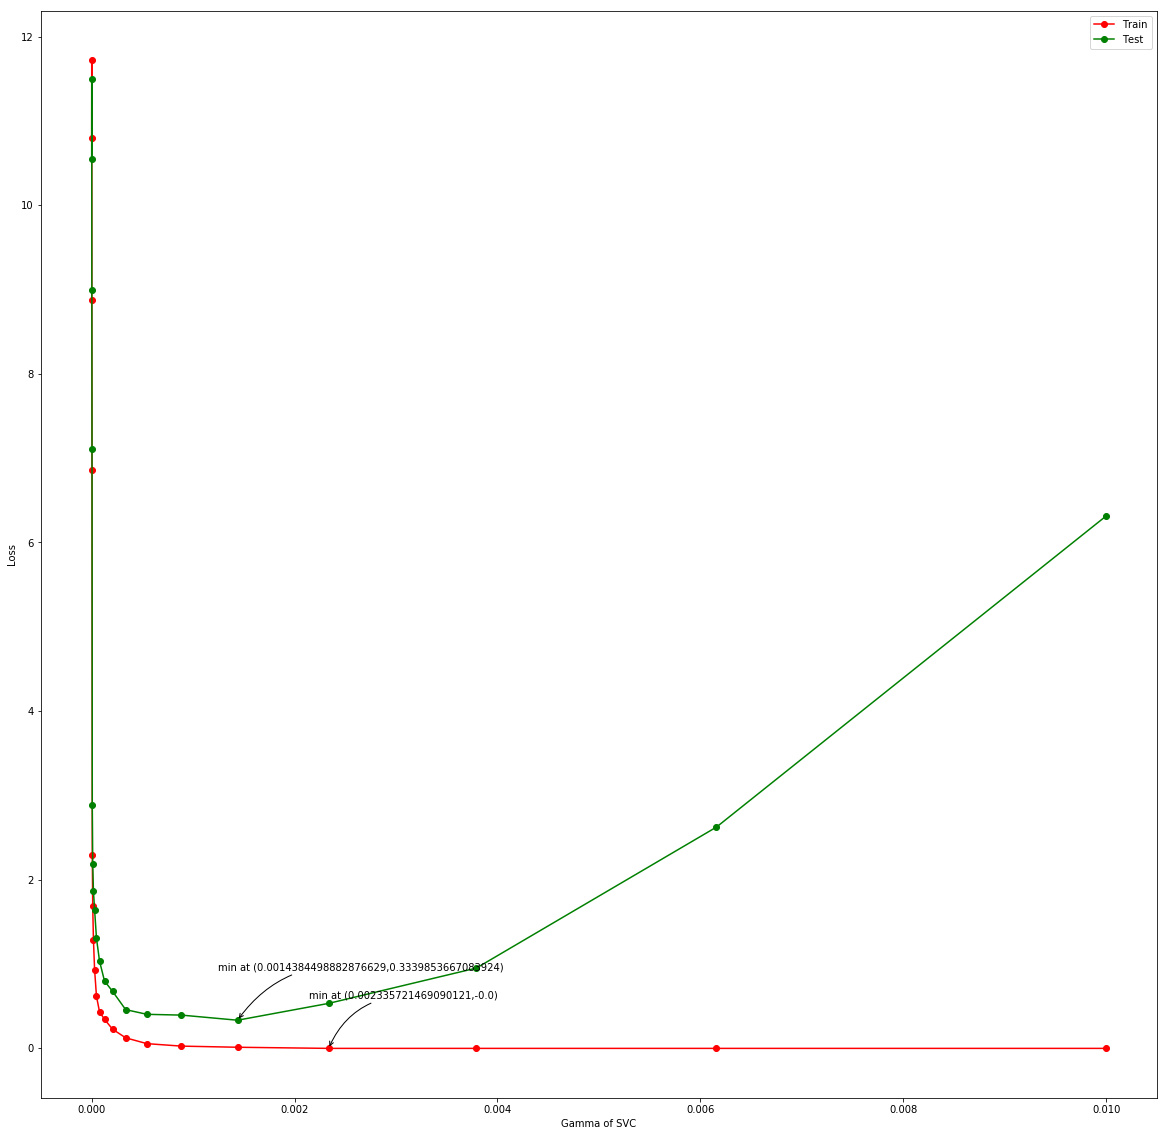

In [25]:
print(train_loss.shape)
print(test_loss.shape)
train_loss_mean = -train_loss.mean(axis=1)
test_loss_mean = -test_loss.mean(axis=1)

plt.figure(figsize=(20,20))
plt.plot(param_range,train_loss_mean,'ro-',label='Train')
plt.plot(param_range,test_loss_mean,'go-',label='Test')
plt.ylabel("Loss")
plt.xlabel("Gamma of SVC")
plt.legend(loc="best")

#min
min_index = np.argmin(train_loss_mean)
min_y = train_loss_mean[min_index]
min_x = param_range[min_index]
plt.annotate("min at ({},{})".format(min_x,min_y),(min_x,min_y),xycoords="data",xytext=(-20,50),textcoords="offset points",arrowprops={
    "arrowstyle":"->",
    "connectionstyle":"arc3,rad=0.3"
})

min_index = np.argmin(test_loss_mean)
min_y = test_loss_mean[min_index]
min_x = param_range[min_index]
plt.annotate("min at ({},{})".format(min_x,min_y),(min_x,min_y),xycoords="data",xytext=(-20,50),textcoords="offset points",arrowprops={
    "arrowstyle":"->",
    "connectionstyle":"arc3,rad=0.3"
})
plt.show()